In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#Make the dataset
N=1000
X = np.random.random((N,2)) * 6 -3 # Uniform distribution betwenn (-3,3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

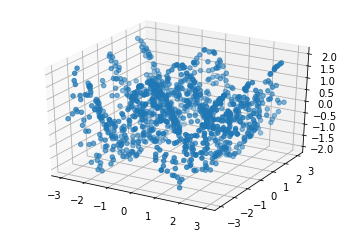

In [5]:
#Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

In [6]:
#Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [7]:
#Compile the model
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer,loss='mse')

In [ ]:
#Fit or train the model
r = model.fit(X,Y,epochs=100)

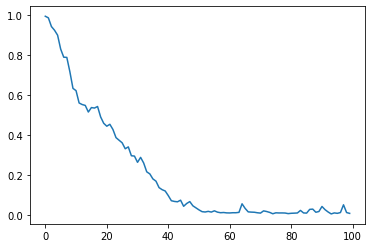

In [9]:
plt.plot(r.history['loss'],label='loss')

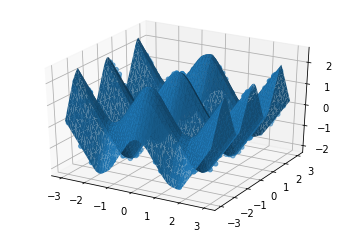

In [11]:
#Plot the surface
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

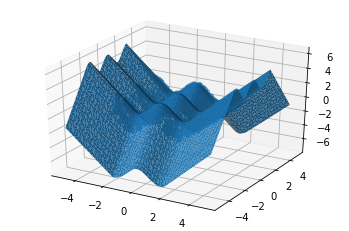

In [12]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()